In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

### 1 - Ejercicio

Simular N=100 muestras de una V.A X con distribución N(0,1)
- Encontrar la curtosis y oblicuidad
- Encontrar el IQR
- Estimar el desvio estandar usando el rango de mediciones simuladas
- Trazar el diagrama de BOX

In [2]:
mu, sigma = 0, 1 # media y desvio estandar
n = 100  # nº muestras
X = np.random.normal(mu, sigma, n)

In [6]:
# Curtosis
print("Curtosis:", kurtosis(X))

Curtosis: -0.10037310299268976


In [3]:
# Oblicuidad
print("Oblicuidad:", skew(X))

Oblicuidad: 0.10161644378757455


In [13]:
# IQR
q3 = np.quantile(X, 0.75)
q1 = np.quantile(X, 0.25)
iqr = q3-q1
print("IQR:", iqr)

IQR: 1.3741435235329298


In [18]:
rango = np.quantile(X, 0.975) - np.quantile(X, 0.025)
std_estimado = rango / 4
std_aritmetico = X.std()
print("Desvio estandar estimado", std_estimado, "vs", std_aritmetico)

Desvio estandar estimado 0.8508382330496844 vs 0.9904349712148675


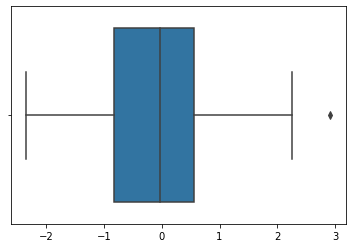

In [26]:
sns.boxplot(x=X)
plt.show()

### 2 - Ejercicio

Simular N=100 muestras de una V.A X con distribución exponencial lamda=1
- Encontrar la curtosis y oblicuidad
- Encontrar el IQR
- Estimar el desvio estandar usando el rango de mediciones simuladas
- Trazar el diagrama de BOX

In [34]:
n = 100  # nº muestras
X2 = np.random.exponential(1, n)

In [35]:
# Curtosis
print("Curtosis:", kurtosis(X2))

Curtosis: 13.072145435157399


In [36]:
# Oblicuidad
print("Oblicuidad:", skew(X2))

Oblicuidad: 2.7497436255401446


In [37]:
# IQR
q3 = np.quantile(X2, 0.75)
q1 = np.quantile(X2, 0.25)
iqr = q3-q1
print("IQR:", iqr)

IQR: 1.1573539569640976


In [38]:
rango = np.quantile(X2, 0.975) - np.quantile(X2, 0.025)
std_estimado = rango / 4
std_aritmetico = X2.std()
print("Desvio estandar estimado", std_estimado, "vs", std_aritmetico)

Desvio estandar estimado 0.7399415843642688 vs 1.0222699159388478


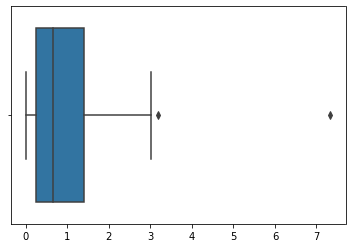

In [39]:
sns.boxplot(x=X2)
plt.show()

### 3 - Ejercicio